In [1]:

suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
suppressMessages(library(SeuratData))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(ggsci))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(LSD))
suppressMessages(library(readxl))
suppressMessages(library(ggrepel))
suppressMessages(library(randomForest))
suppressMessages(library(harmony))

# Plot each clusters
myHighlightDimPlot = function(seuratObj, highlightBy, size=1, alpha=1, showAllPoints=FALSE, ...) {
    umapTb = as_tibble(seuratObj@reductions$umap@cell.embeddings)
    if (!identical(rownames(seuratObj@reductions$umap@cell.embeddings), rownames(seuratObj@meta.data)))
        stop("Error: cell names not identical!")
    umapTb = cbind(umapTb, seuratObj@meta.data)
    highlightByClass = sort(unique(umapTb[[highlightBy]]))
    gpList = lapply(highlightByClass, function(cl) {
        subUmapTb = subset(umapTb, umapTb[[highlightBy]] == cl)
        if (showAllPoints) {
            gp = ggplot() + 
                geom_point(data=umapTb, aes(x=UMAP_1, y=UMAP_2), color="grey", shape=16, size=size, alpha=alpha) +
                geom_point(data=subUmapTb, aes(x=UMAP_1, y=UMAP_2), color="red", shape=16, size=size, alpha=alpha) +
                xlim(min(umapTb$UMAP_1), max(umapTb$UMAP_1)) +
                ylim(min(umapTb$UMAP_2), max(umapTb$UMAP_2)) +
                coord_fixed() +
                theme_void() 
        } else {
            gp = ggplot() + 
                geom_point(data=umapTb, aes(x=UMAP_1, y=UMAP_2), color="grey", shape=16, size=size, alpha=alpha) +
                geom_point(data=subUmapTb, aes(x=UMAP_1, y=UMAP_2), color="red", shape=16, size=size, alpha=alpha) +
                xlim(min(umapTb$UMAP_1), max(umapTb$UMAP_1)) +
                ylim(min(umapTb$UMAP_2), max(umapTb$UMAP_2)) +
                coord_fixed() +
                theme_void()
        }
        return(gp)
    })
    gpAll = plot_grid(plotlist=gpList, labels=highlightByClass, ...)
    return(gpAll)
}

In [2]:
seurat=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/macaque_snrna_all_soupX_unfil_batch3_0821.rds')

seurat

An object of class Seurat 
21623 features across 119142 samples within 1 assay 
Active assay: RNA (21623 features, 0 variable features)

In [3]:
table(seurat@meta.data$group)
length(unique(seurat@meta.data$group))


 4144-1 4144-10 4144-11 4144-12 4144-13 4144-14 4144-15 4144-16 4144-17 4144-18 
   5941    5415    6014    6064    6083    6239    6012    5995    5854    5888 
4144-19  4144-2 4144-20  4144-3  4144-4  4144-5  4144-6  4144-7  4144-8  4144-9 
   5895    5952    6101    6056    5970    5773    6078    6174    5778    5860 

[1] 20

In [4]:
seurat@meta.data

orig.ident    nCount_RNA nFeature_RNA group 
4144-1_CELL1037_N2 SeuratProject  3827      2140         4144-1
4144-1_CELL817_N4  SeuratProject  8775      3486         4144-1
4144-1_CELL2938_N1 SeuratProject  2593      1507         4144-1
4144-1_CELL2866_N1 SeuratProject  2749      1679         4144-1
4144-1_CELL3514_N1 SeuratProject  1784       895         4144-1
4144-1_CELL1007_N2 SeuratProject  3576      2068         4144-1
4144-1_CELL45_N5   SeuratProject 13517      3922         4144-1
4144-1_CELL540_N4  SeuratProject  4852      2380         4144-1
4144-1_CELL1950_N2 SeuratProject  6980      2671         4144-1
4144-1_CELL160_N3  SeuratProject  9818      3259         4144-1
4144-1_CELL3591_N1 SeuratProject  1518       805         4144-1
4144-1_CELL4494_N1 SeuratProject  1076       306         4144-1
4144-1_CELL2108_N3 SeuratProject  4742      2113         4144-1
4144-1_CELL984_N2  SeuratProject  3741      1961         4144-1
4144-1_CELL4369_N1 SeuratProject  1139       354         4144-1
4144-1_CELL680_N3  SeuratProject  5718      2505         4144-1
4144-1_CELL958_N6  SeuratProject 10550      3342         4144-1
4144-1_CELL463_N5  SeuratProject  6546      2560         4144-1
4144-1_CELL2494_N1 SeuratProject  4061      1927         4144-1
4144-1_CELL5609_N1 SeuratProject   952       657         4144-1
4144-1_CELL1968_N3 SeuratProject  4908      2258         4144-1
4144-1_CELL2457_N1 SeuratProject  4242      2176         4144-1
4144-1_CELL5337_N1 SeuratProject  1004       660         4144-1
4144-1_CELL1849_N2 SeuratProject  2793      1532         4144-1
4144-1_CELL2363_N1 SeuratProject  5542      2144         4144-1
4144-1_CELL2087_N3 SeuratProject  4907      2122         4144-1
4144-1_CELL1225_N3 SeuratProject  4910      2546         4144-1
4144-1_CELL5389_N1 SeuratProject   958       553         4144-1
4144-1_CELL871_N5  SeuratProject  7898      3144         4144-1
4144-1_CELL2504_N1 SeuratProject  3998      2018         4144-1
⋮                  ⋮             ⋮          ⋮            ⋮     
4144-9_CELL5066_N1 SeuratProject 1157        711         4144-9
4144-9_CELL4187_N1 SeuratProject 1390        486         4144-9
4144-9_CELL5767_N1 SeuratProject 1019        634         4144-9
4144-9_CELL5556_N1 SeuratProject 1073        661         4144-9
4144-9_CELL5346_N1 SeuratProject 1067        304         4144-9
4144-9_CELL4433_N1 SeuratProject 1281        488         4144-9
4144-9_CELL4691_N1 SeuratProject 1217        385         4144-9
4144-9_CELL3536_N1 SeuratProject 1899        463         4144-9
4144-9_CELL5432_N1 SeuratProject 1054        374         4144-9
4144-9_CELL974_N2  SeuratProject 2327       1087         4144-9
4144-9_CELL3975_N1 SeuratProject 1539        756         4144-9
4144-9_CELL5572_N1 SeuratProject 1043        646         4144-9
4144-9_CELL5140_N1 SeuratProject 1161        730         4144-9
4144-9_CELL4582_N1 SeuratProject 1272        680         4144-9
4144-9_CELL5574_N1 SeuratProject 1064        718         4144-9
4144-9_CELL5509_N1 SeuratProject 1054        338         4144-9
4144-9_CELL5600_N1 SeuratProject 1118        690         4144-9
4144-9_CELL4568_N1 SeuratProject 1318        961         4144-9
4144-9_CELL4231_N1 SeuratProject 1364        798         4144-9
4144-9_CELL5407_N1 SeuratProject 1008        501         4144-9
4144-9_CELL4698_N1 SeuratProject 1219        760         4144-9
4144-9_CELL5728_N1 SeuratProject  999        345         4144-9
4144-9_CELL5684_N1 SeuratProject  997        453         4144-9
4144-9_CELL3923_N1 SeuratProject 1459        593         4144-9
4144-9_CELL4790_N1 SeuratProject 1199        808         4144-9
4144-9_CELL5039_N1 SeuratProject 1135        423         4144-9
4144-9_CELL5697_N1 SeuratProject 1016        583         4144-9
4144-9_CELL4768_N1 SeuratProject 1226        793         4144-9
4144-9_CELL5170_N1 SeuratProject 1092        446         4144-9
4144-9_CELL4940_N1 SeuratProject 1146        518         4144-9

In [5]:
#去除 median nfeature <500
df_meta=seurat@meta.data
group_med_feature=df_meta %>% group_by(group)  %>% summarise(med=median(nFeature_RNA))
select_group=group_med_feature[group_med_feature$med > 500,]$group
#被去掉的文库
length(group_med_feature$group)
group_med_feature[group_med_feature$med < 500,]$group
length(select_group)

seurat=subset(seurat,group %in% select_group)


[1] 20

character(0)

[1] 20

In [6]:
MTGenes = c("ND6","COX3","COX1","ND5","ND4","ND2","ND4L","ATP8","CYTB","COX2","ND3","ATP6","ND1")
seurat[["percent.mt"]] <- PercentageFeatureSet(seurat,features  = MTGenes)



In [7]:
libMetaTb = read_xlsx(paste0(
    "/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all", 
    "/屏状核-建库清单.xlsx"
))

In [8]:
head(libMetaTb)
nrow(libMetaTb)

样本名称   样本编号     分析样本名称 物种及组织部位 目标细胞数
1 MS-cla-001 TQD230352191 MS-cla-001   小鼠屏状核     50000     
2 MS-cla-001 TQD230352191 MS-cla-001   小鼠屏状核     NA        
3 MS-cla-001 TQD230352191 MS-cla-001   小鼠屏状核     NA        
4 MS-cla-001 TQD230352191 MS-cla-001   小鼠屏状核     NA        
5 MS-cla-001 TQD230352191 MS-cla-001   小鼠屏状核     NA        
6 MS-cla-001 TQD230352191 MS-cla-001   小鼠屏状核     NA        
  cDNA文库名称       任务单号                         oligo文库名称      
1 cDNA-2191-1-230323 W230328010\r\nW230328011\r\n青岛 oligo-2191-1-230323
2 cDNA-2191-2-230323 NA                               oligo-2191-2-230323
3 cDNA-2191-3-230323 NA                               oligo-2191-3-230323
4 cDNA-2191-4-230323 NA                               oligo-2191-4-230323
5 cDNA-2191-5-230323 NA                               oligo-2191-5-230323
6 cDNA-2191-6-230323 NA                               oligo-2191-6-230323
  测序平台 状态  
1 T1       已交付
2 T1       已交付
3 T1       已交付
4 T1       已交付
5 T1       已交付
6 T1       已交付

[1] 136

In [9]:
unique(libMetaTb$分析样本名称)

[1] "MS-cla-001"    "MT30-008"      "MT29-043"      "MT29-051"     
 [5] "MS060-cla 001" "MS060-cla 002" "Cla-d"         "Cla-v"        
 [9] "Cla-av"        "Cla-pd"        "Cla"

In [10]:

libMetaTb=libMetaTb[,c('分析样本名称','oligo文库名称')]
colnames(libMetaTb)=c('sampleId','sampleID')
libMetaTb$libId=str_extract(libMetaTb$sampleID,'[0-9][0-9][0-9][0-9]-[0-9]*')
libMetaTb$sampleID=NULL
libMetaTb=libMetaTb[!(is.na(libMetaTb$libId)),]
head(libMetaTb)


sampleId   libId 
1 MS-cla-001 2191-1
2 MS-cla-001 2191-2
3 MS-cla-001 2191-3
4 MS-cla-001 2191-4
5 MS-cla-001 2191-5
6 MS-cla-001 2191-6

In [11]:
seurat@meta.data$libId=seurat@meta.data$group

tmpMetaTb = as_tibble(seurat@meta.data[c("libId")])
tmpMetaTb$cellId = rownames(seurat@meta.data)
tmpMetaTb = left_join(tmpMetaTb, libMetaTb[c("sampleId", "libId")], by="libId")
tmpMetaTb = column_to_rownames(tmpMetaTb, var="cellId")
identical(rownames(tmpMetaTb), rownames(seurat@meta.data))
# str(tmpMetaTb)
seurat = AddMetaData(seurat, tmpMetaTb)
seurat$sampleId = factor(seurat$sampleId)
seurat$libId = factor(seurat$libId)

setdiff(libMetaTb$libId, unique(seurat$libId))
length(setdiff(libMetaTb$libId, unique(seurat$libId)))



[1] TRUE

[1] "2191-1"  "2191-2"  "2191-3"  "2191-4"  "2191-5"  "2191-6"  "2191-7" 
 [8] "2191-8"  "2191-9"  "2191-10" "2192-1"  "2192-2"  "2192-3"  "2192-4" 
[15] "2192-5"  "2192-6"  "2192-7"  "2192-8"  "2192-9"  "2192-10" "2193-1" 
[22] "2193-2"  "2193-3"  "2193-4"  "2193-5"  "2193-6"  "2193-7"  "2193-8" 
[29] "2194-9"  "2194-10" "2194-11" "2194-12" "2350-1"  "2350-2"  "2350-3" 
[36] "2350-4"  "2350-5"  "2350-6"  "2350-7"  "2350-8"  "2350-9"  "2350-10"
[43] "2350-11" "2350-12" "2350-13" "2350-14" "2350-15" "2350-16" "2934-1" 
[50] "2934-2"  "2934-3"  "2934-4"  "2934-5"  "2934-6"  "2934-7"  "2934-8" 
[57] "2934-9"  "2934-10" "2934-11" "2934-12" "2934-13" "2934-14" "2934-15"
[64] "2934-16" "3064-1"  "3064-2"  "3065-1"  "3065-2"  "3066-1"  "3066-2" 
[71] "3067-1"  "3067-2"  "3068-1"  "3068-2"  "3068-3"  "3068-4"  "3068-5" 
[78] "3068-6"  "3069-1"  "3069-2"  "3069-3"  "3069-4"  "3069-5"  "3069-6"

[1] 84

In [12]:
seurat

An object of class Seurat 
21623 features across 119142 samples within 1 assay 
Active assay: RNA (21623 features, 0 variable features)

In [13]:
# Basic filtering
#修改为200
oriCellNum = ncol(seurat)
seurat$countFeatureRatio = seurat$nCount_RNA / seurat$nFeature_RNA
seurat = subset(seurat, nFeature_RNA > 300 & percent.mt < 5 & countFeatureRatio > 1.2)
cellNum1 = ncol(seurat)
cellNum1
message("Filter ratio: ", cellNum1/oriCellNum)

[1] 89031

Filter ratio: 0.74726796595659



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


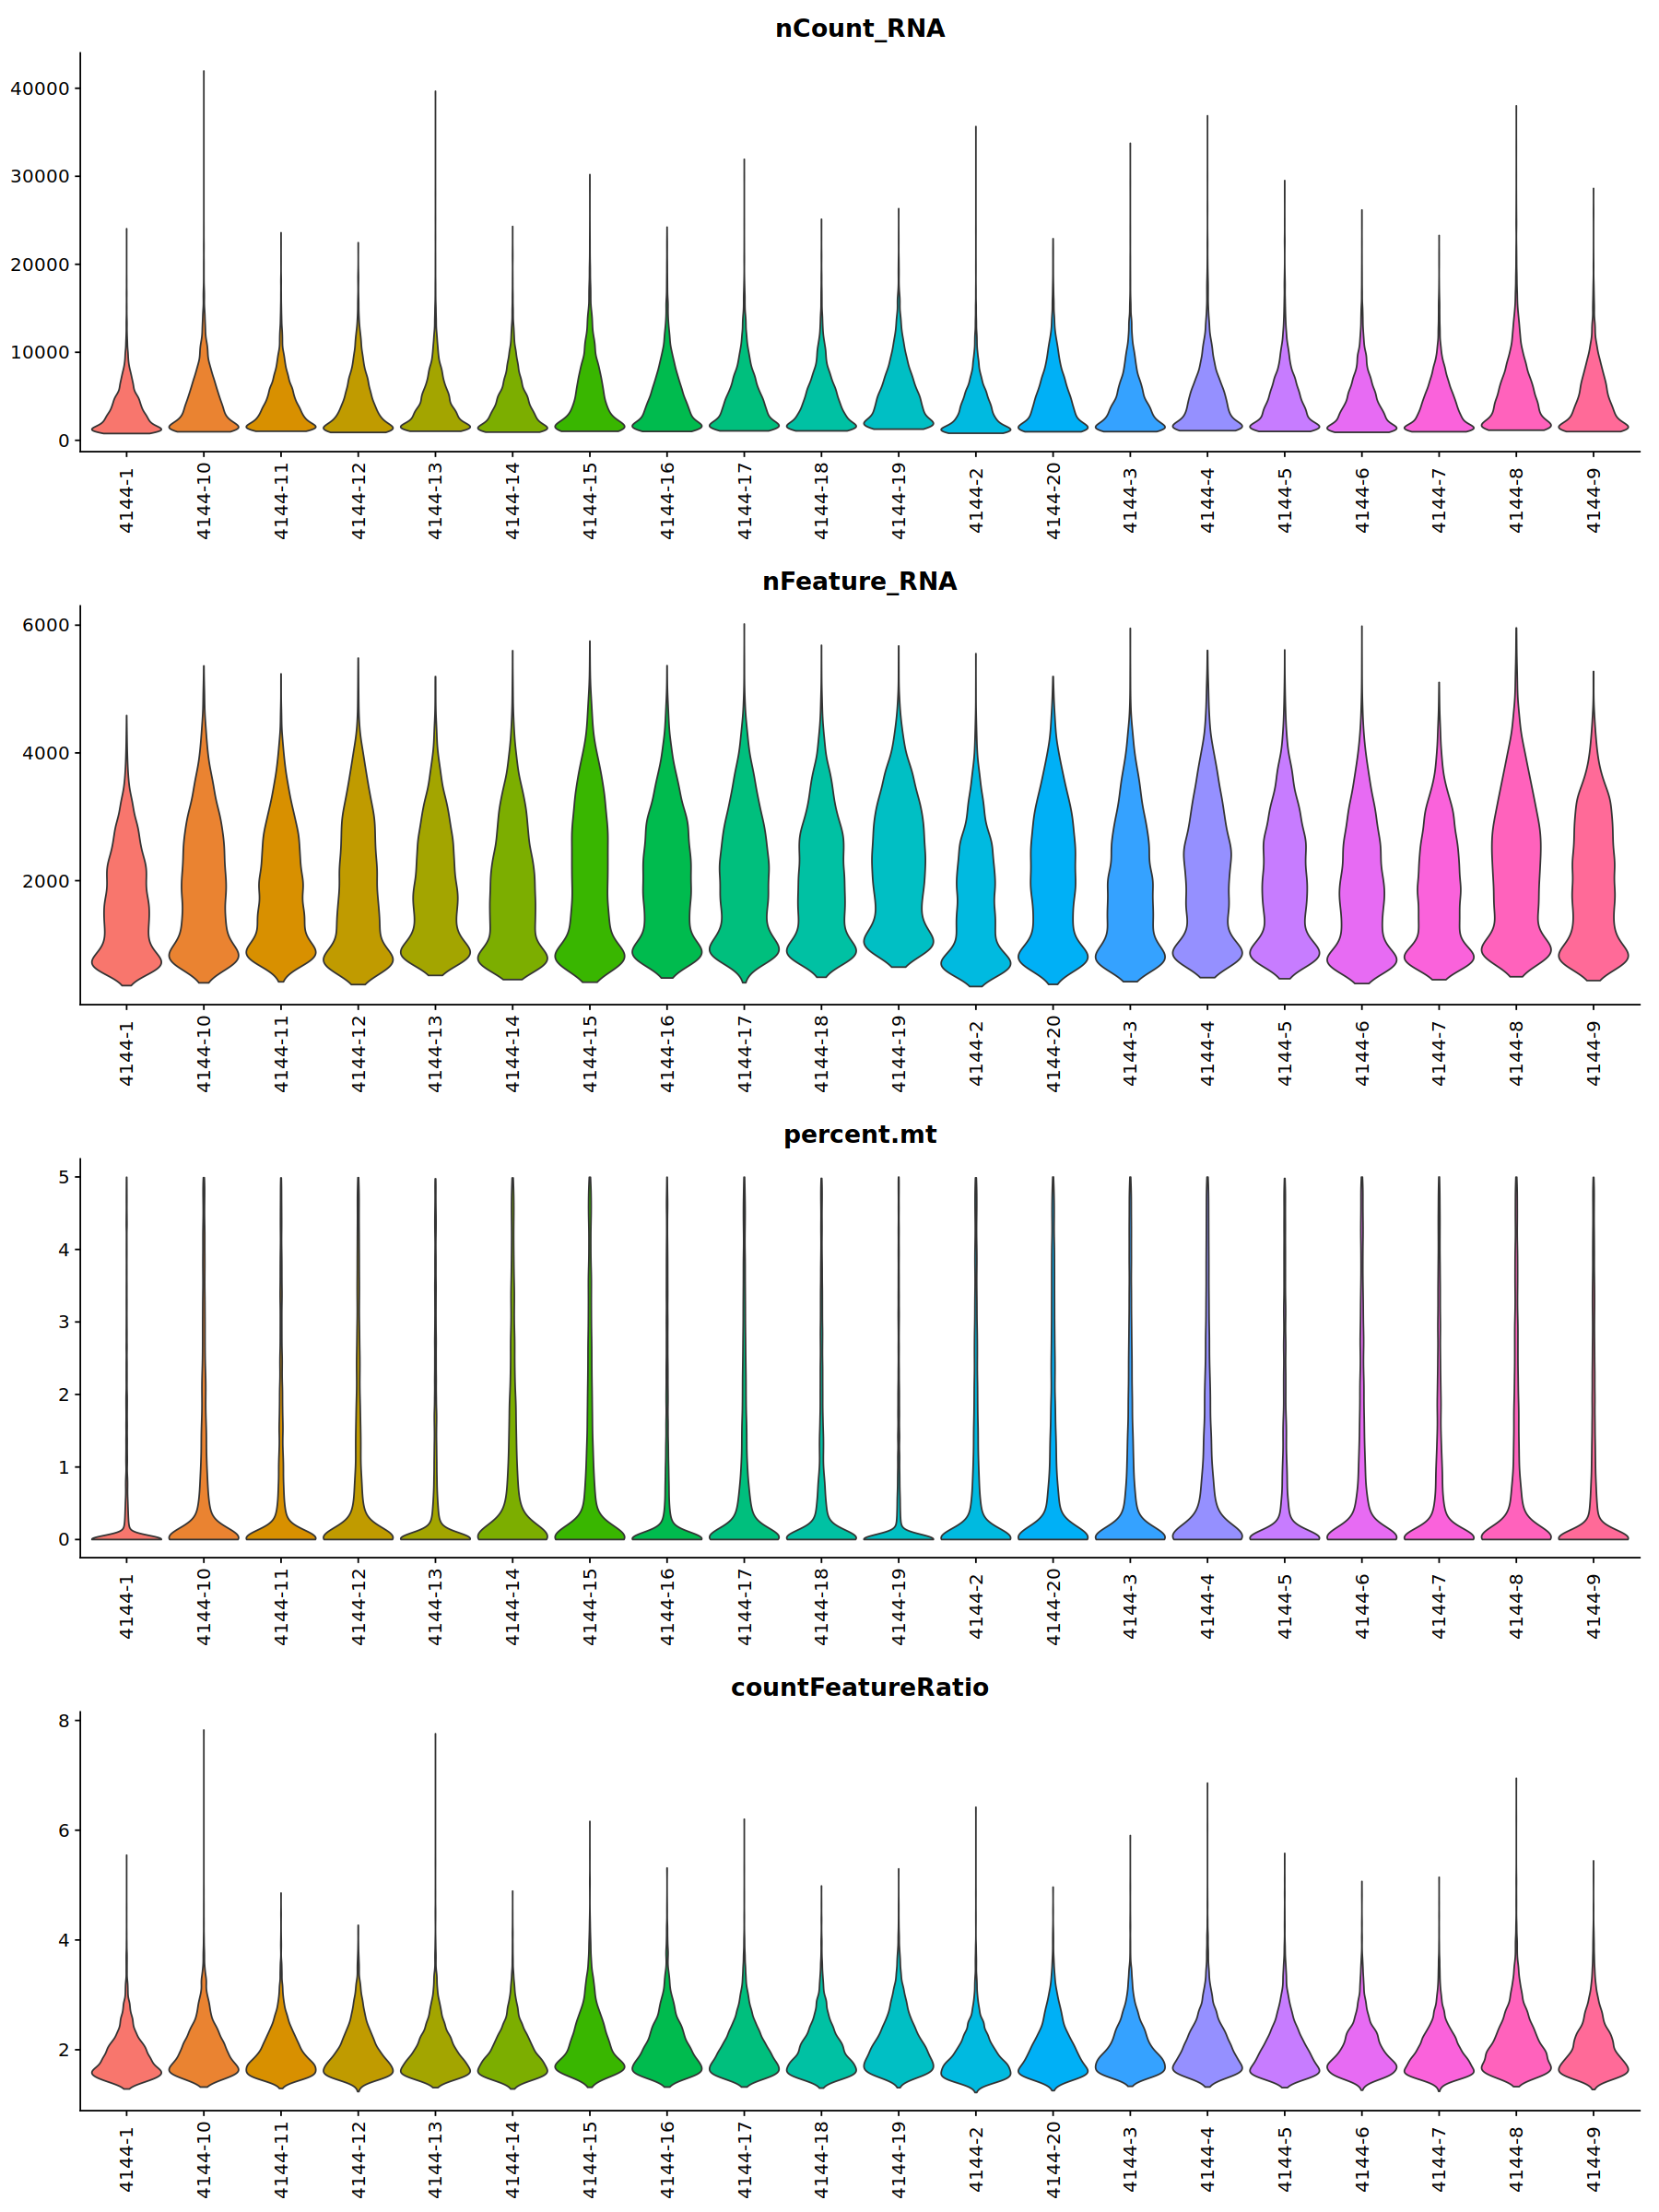

In [14]:
Idents(seurat) = "libId"
options(repr.plot.width=15, repr.plot.height=20)
print(plot_grid(
    plotlist = lapply(c("nCount_RNA", "nFeature_RNA", "percent.mt", "countFeatureRatio"), function(x) {
        p = VlnPlot(seurat, features=x, pt.size=0) + 
            theme(axis.text.x=element_text(vjust=0.5, hjust=0.5, angle=90), axis.title.x = element_blank()) +
            guides(fill=FALSE)
        return(p)
    }), 
    ncol=1, align="hv", axis="tblr"
))

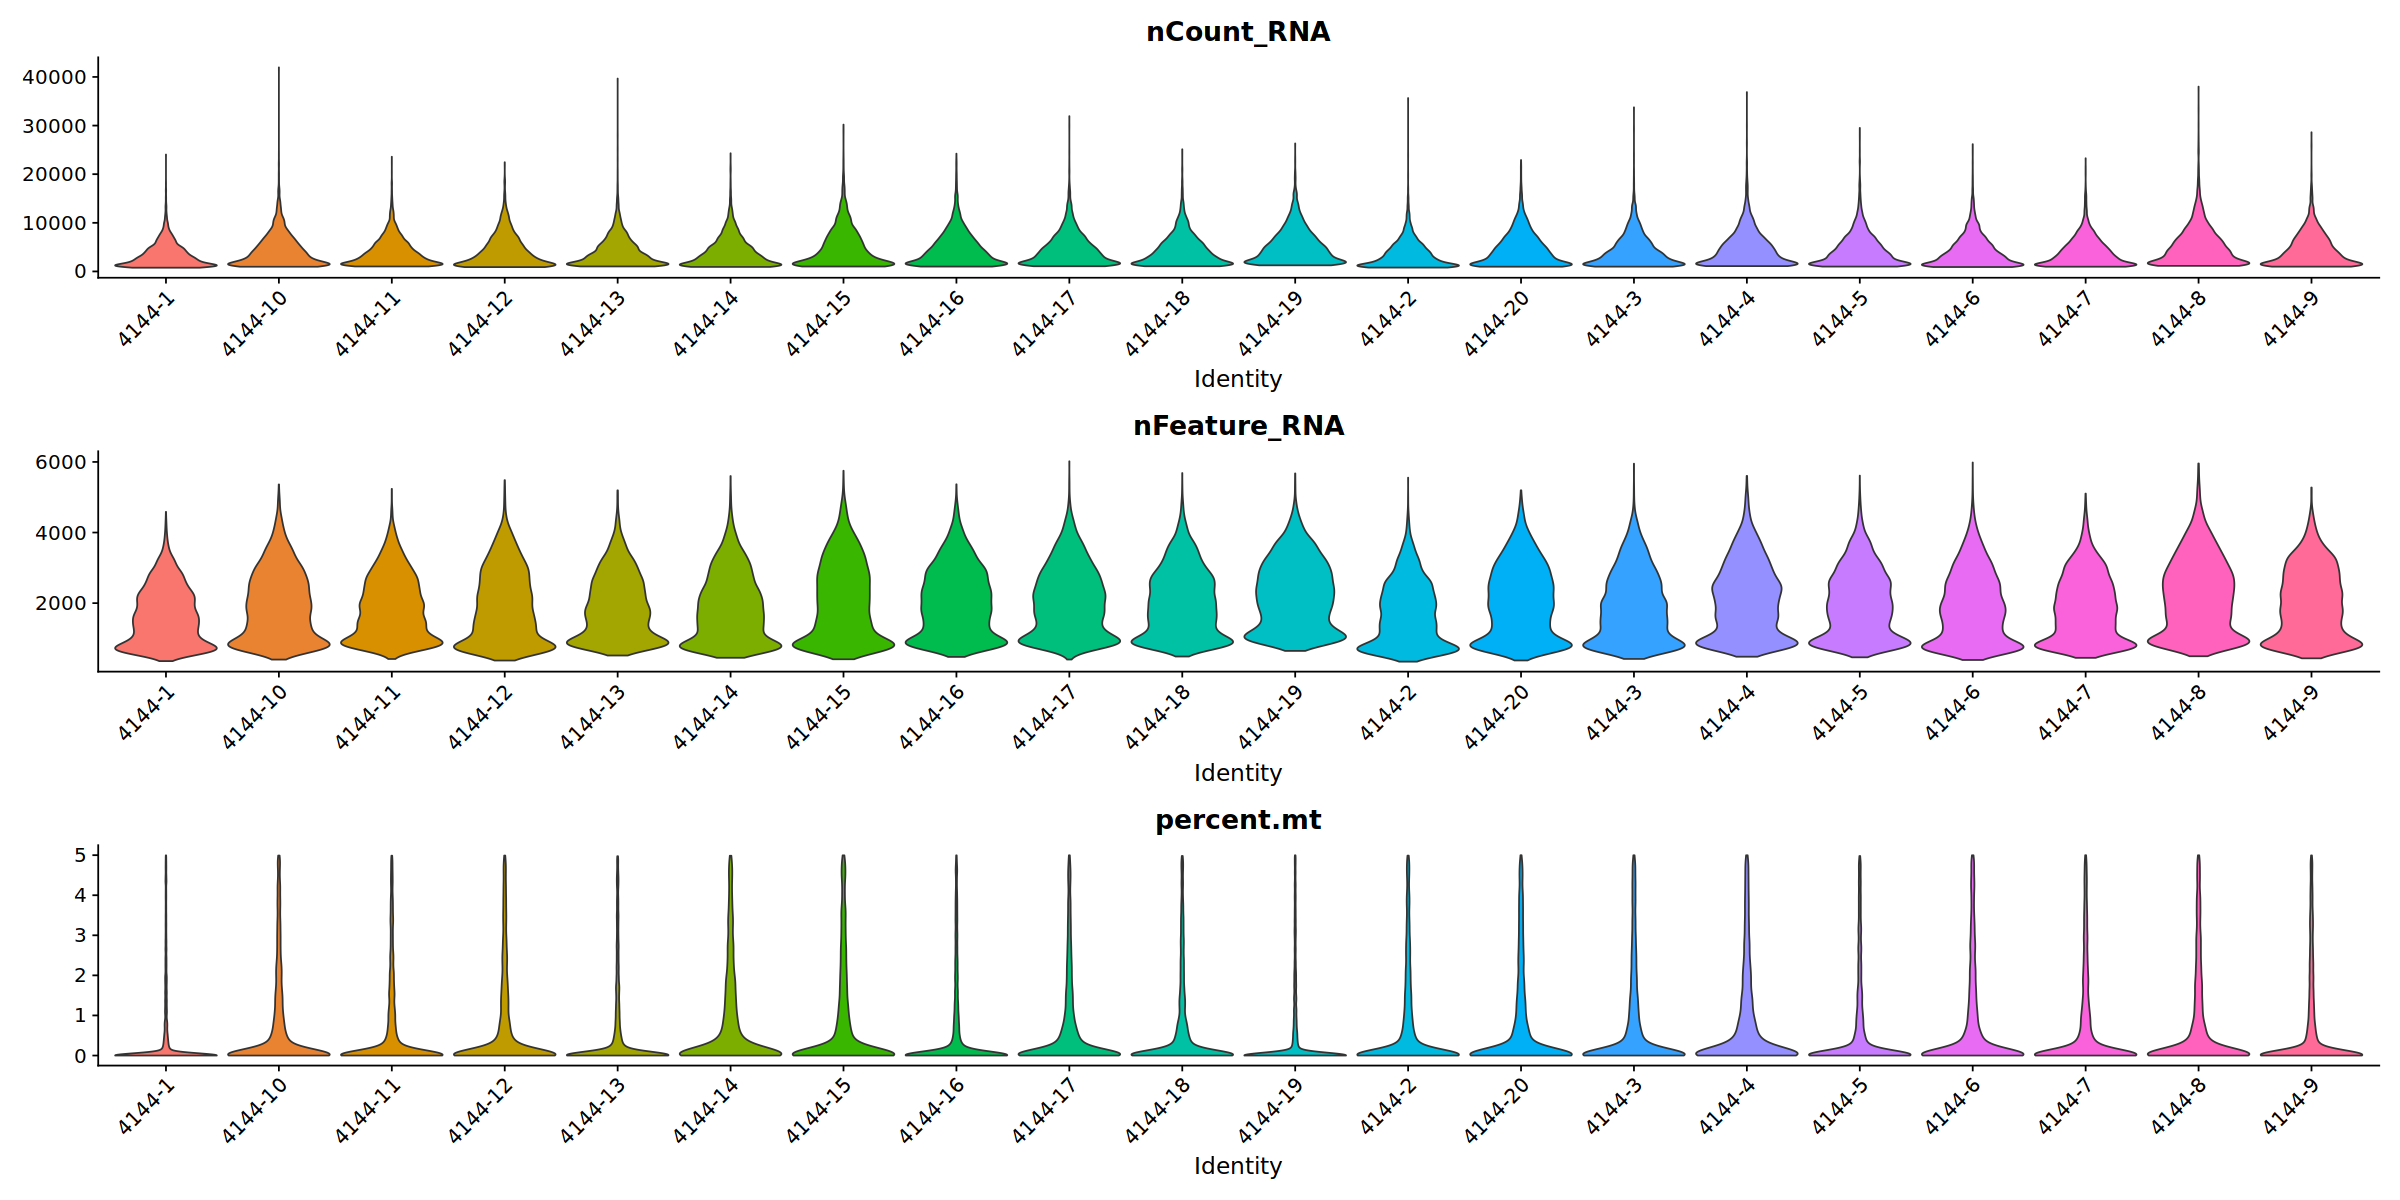

In [15]:
options(repr.plot.width=20, repr.plot.height=10)
Idents(seurat) = "group"
VlnPlot(seurat, features=c("nCount_RNA", "nFeature_RNA", "percent.mt"), pt.size=0, ncol=1)



In [16]:
#更正后mt正确版本
saveRDS(seurat,'/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/batch_normalize_renew_1031/renew_fil_data_nFeature300_MT5/macaque_snrna_all_soupX_fil_batch3_0821_1031.rds')


In [17]:
head(seurat@meta.data)

orig.ident    nCount_RNA nFeature_RNA group  percent.mt
4144-1_CELL1037_N2 SeuratProject 3827       2140         4144-1 0.36582179
4144-1_CELL817_N4  SeuratProject 8775       3486         4144-1 0.04558405
4144-1_CELL2938_N1 SeuratProject 2593       1507         4144-1 0.03856537
4144-1_CELL2866_N1 SeuratProject 2749       1679         4144-1 0.03637686
4144-1_CELL3514_N1 SeuratProject 1784        895         4144-1 0.00000000
4144-1_CELL1007_N2 SeuratProject 3576       2068         4144-1 0.00000000
                   libId  sampleId countFeatureRatio
4144-1_CELL1037_N2 4144-1 Cla      1.788318         
4144-1_CELL817_N4  4144-1 Cla      2.517212         
4144-1_CELL2938_N1 4144-1 Cla      1.720637         
4144-1_CELL2866_N1 4144-1 Cla      1.637284         
4144-1_CELL3514_N1 4144-1 Cla      1.993296         
4144-1_CELL1007_N2 4144-1 Cla      1.729207

In [22]:
#原有mt不正确版本

saveRDS(seurat,'/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/macaque_snrna_all_soupX_fil_batch3_0821.rds')




In [16]:
options(future.globals.maxSize= 891289600)
seurat1=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/renew_data0425/sn_rna_data/snrna_matrix_20230420/sum_data/maca/macaca_snrna_all_soupX_unfil_0425_sct.rds')
seurat1$batch='batch1'

seurat2=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0709_renew/soupX.flt_Matrix/macaque_snrna_all_soupX_fil_batch2_0709.rds')
seurat2$batch='batch2'

seurat3=readRDS('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/macaque_snrna_all_soupX_fil_batch3_0821.rds')
seurat3$batch='batch3'

classFiltSeurat1=merge(seurat1,seurat2)
classFiltSeurat=merge(classFiltSeurat1,seurat3)
classFiltSeurat

# Do sct together
classFiltSeurat = SCTransform(
    classFiltSeurat, assay="RNA",
    ncells=ncol(classFiltSeurat[["RNA"]]),
    variable.features.n=5000,
    vars.to.regress="percent.mt",
    return.only.var.genes = T,
    method="glmGamPoi"
)
classFiltSeurat = classFiltSeurat %>%
    RunPCA(npcs=100, verbose = FALSE) %>%
    FindNeighbors(dims = 1:50) %>%
    FindClusters(verbose = FALSE) %>%
    RunUMAP(dims = 1:50)

saveRDS(classFiltSeurat,paste0('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix', "/macaque_snrna_batch123_soupX_fil300_SCT_0821_0619_0524_anno_SCT.rds"))




In [ ]:
#!/bin/bash
#SBATCH -e /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/err
#SBATCH -o /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/out
#SBATCH -J 22222222222222
#SBATCH -p grande
#SBATCH -n 3
Rscript  /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/sct_batch123.R


In [2]:
seurat=readRDS(paste0('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix', "/macaque_snrna_batch123_soupX_fil300_SCT_0821_0619_0524_anno_SCT.rds"))



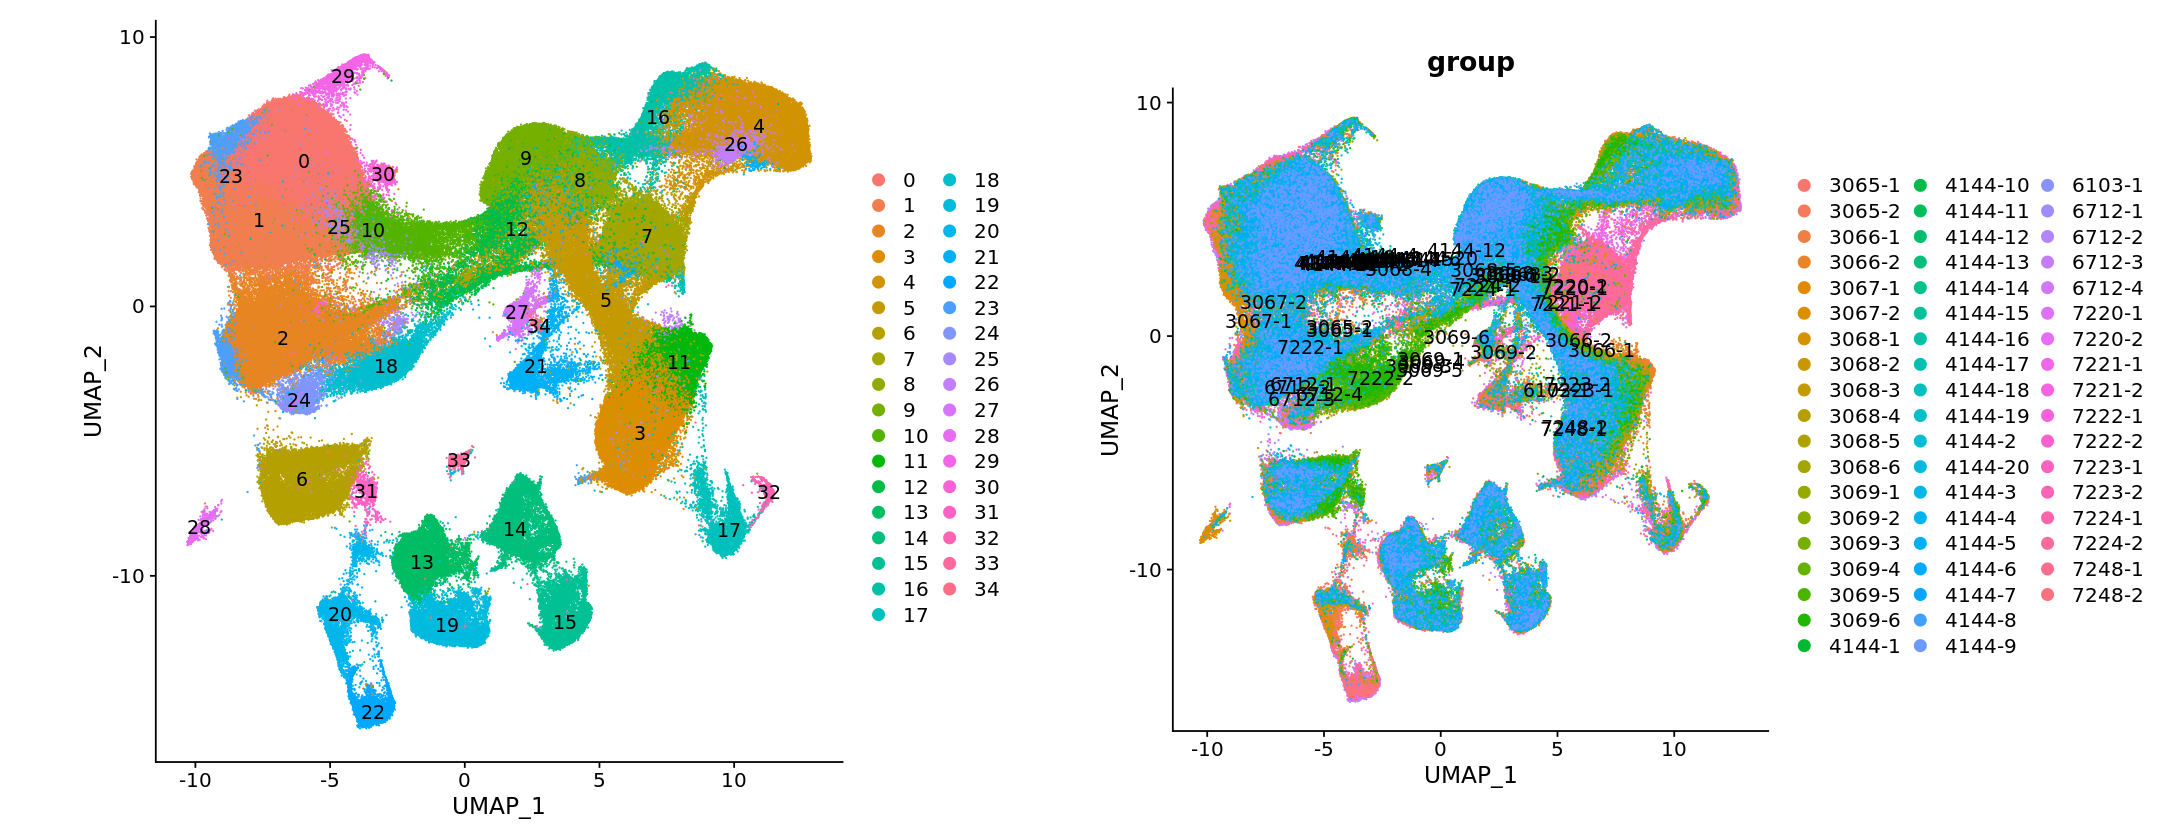

In [3]:
options(repr.plot.width=18, repr.plot.height=7)
plot_grid(
    DimPlot(seurat, reduction="umap", label=T,raster=FALSE)+coord_fixed(),
    #DimPlot(seurat, reduction="umap", group.by="sampleId", label=T)+coord_fixed(),
    DimPlot(seurat, reduction="umap", group.by="group", label=T,raster=FALSE)+coord_fixed(),
    nrow=1
)

In [4]:
seurat

An object of class Seurat 
43339 features across 369816 samples within 2 assays 
Active assay: SCT (21376 features, 5000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found (10 out of 13 shown): DLX6-AS1, AQP4, GJA1, DNAH12, ZMYDN10, IQCG, ALPHA-SMA, PDGFRALPHA, VECAD, CD105”


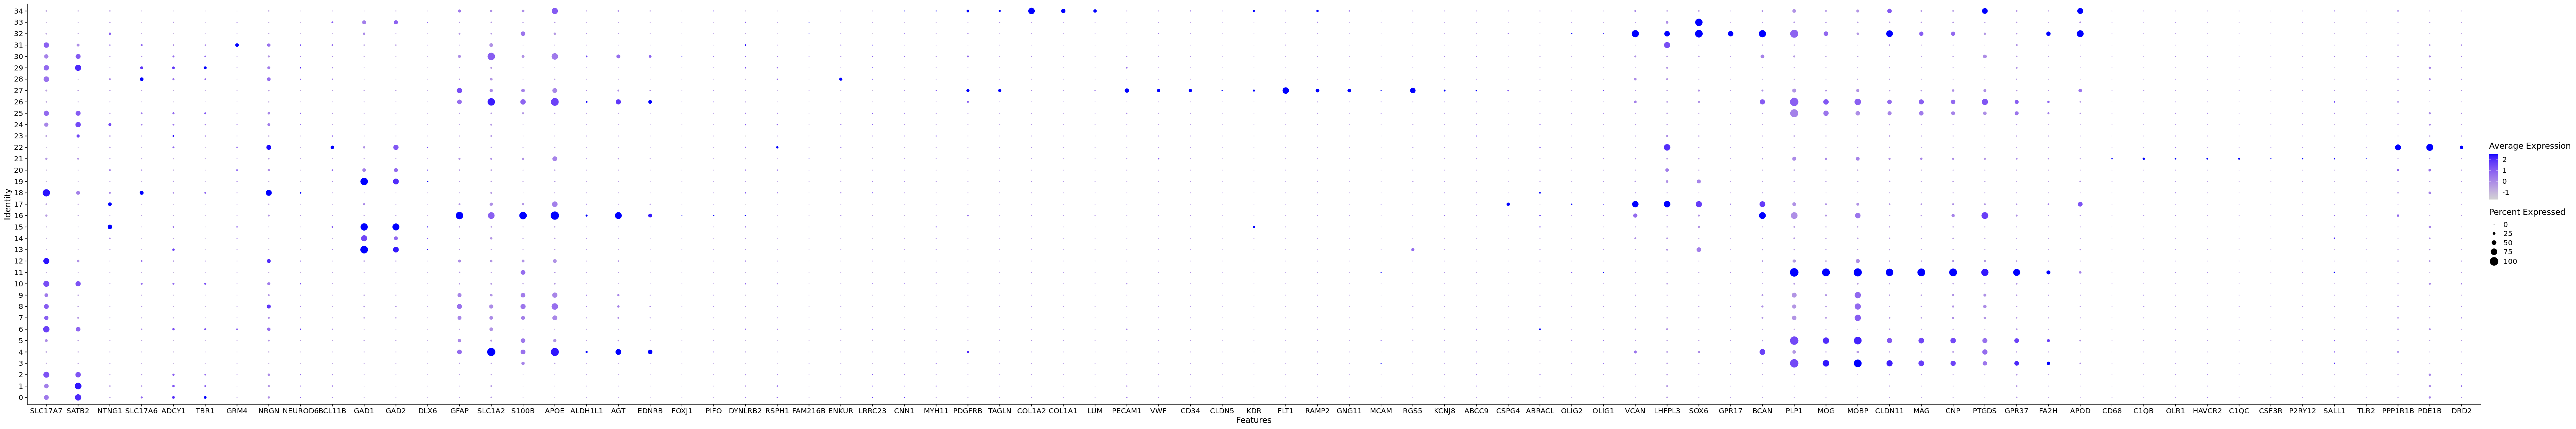

In [10]:
selectMarkers = c(
    "SLC17A7","SATB2",'NTNG1','SLC17A6','ADCY1','TBR1','GRM4','NRGN','NEUROD6','BCL11B', # Excit
    "GAD1", "GAD2",'DLX6','DLX6-AS1', # Inhib,
    "GFAP", "SLC1A2", "SLC1A2", "S100B", "AQP4", "APOE",'GJA1','ALDH1L1','AGT','EDNRB', # Astrocytes
    "FOXJ1", "PIFO", "DYNLRB2", "RSPH1", "DNAH12", "FAM216B", "ZMYDN10", "IQCG", "ENKUR","LRRC23", # Ependymal
    "CNN1", "MYH11", "PDGFRB", "TAGLN", "ALPHA-SMA", # VSMC
    "COL1A2", 'COL1A1','LUM','PDGFRALPHA',# VLMC
    "PECAM1","VWF","CD34","VECAD" ,"CLDN5","KDR","CD105",'FLT1','RAMP2','GNG11',# Endotheial
    "PDGFRB", "MCAM", "RGS5", "ALPHA-SMA", "KCNJ8",'TAGLN','COX4l2','MOTCH3','ABCC9','CSPG4', # Pericytes
    "ABRACL", "PDGFRALPHA", "OLIG2", "CSPG4", "OLIG1", "VCAN",'LHFPL3','SOX6','GPR17','BCAN', # OPC
    "PLP1",'MOG','MOBP','CLDN11','MAG','CNP','PTGDS','GPR37','FA2H','APOD', # Oligo
    'CD68','C1QB','OLR1','HAVCR2','C1QC','CSF3R','CS3CR1','P2RY12','SALL1','TLR2',# Microglia
    'PPP1R1B','BCL11B','PDE1B','DRD2'
)


selectMarkers=selectMarkers

selectMarkers=selectMarkers[!duplicated(selectMarkers)]
Idents(seurat) = "seurat_clusters"
options(repr.plot.height=10,repr.plot.width=60)
DotPlot(seurat, features = selectMarkers)





In [17]:
seurat@meta.data$class='Uncertain'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(0,1,2,6,10,12,18,24,28,29,31,23),]$class='Excit_Neuron'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(13,14,15,19,20),]$class='Inhibit_Neuron'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(4,16,30),]$class='Astrocytes'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(3,5,11),]$class='Oligo'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(27),]$class='Endotheial'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(22),]$class='MSN'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(17,32),]$class='OPC'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(21),]$class='Microglia'
seurat@meta.data[seurat@meta.data$seurat_clusters %in% c(34,33),]$class='VLMC'



In [21]:
unique(seurat@meta.data[seurat@meta.data$class %in% 'Uncertain',]$seurat_clusters
)


[1] 9  7  8  25 26
35 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 34

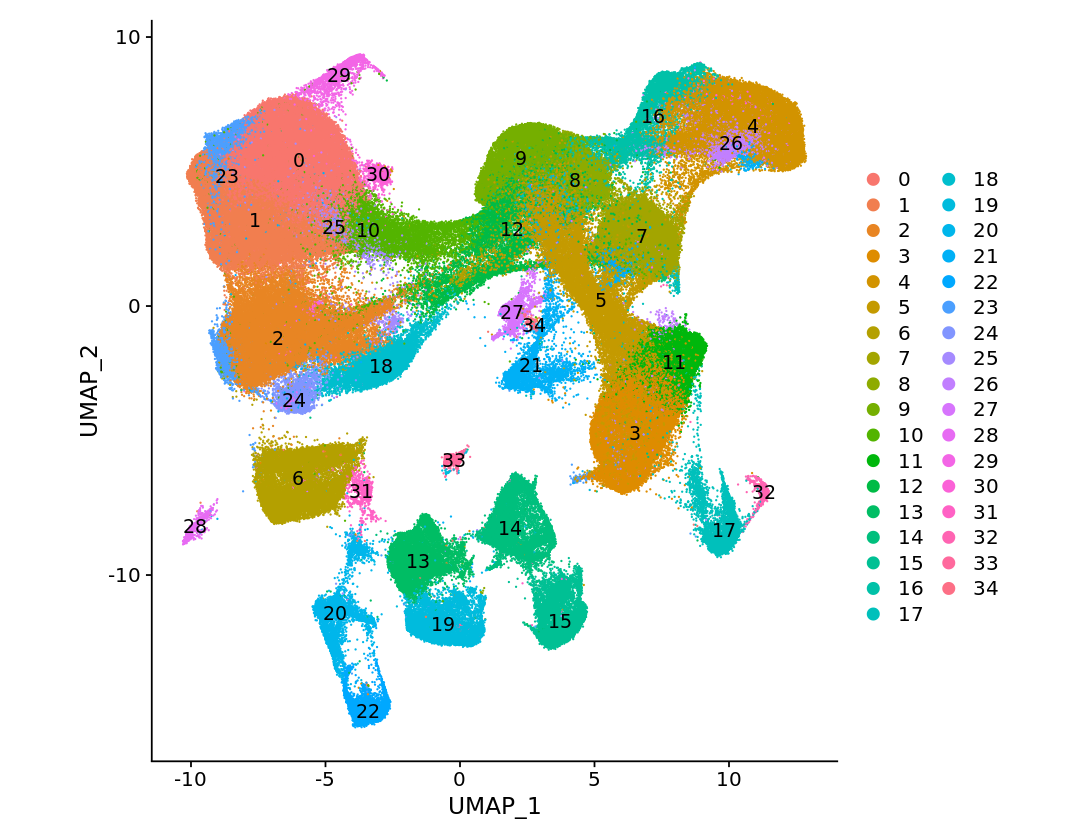

In [19]:
df_test=seurat@reductions$umap@cell.embeddings
df_test=as.data.frame(df_test)
df_test$X=rownames(df_test)

df_meta=seurat@meta.data
df_meta=as.data.frame(df_meta)
df_meta$X=rownames(df_meta)
df_meta=df_meta[,c('nFeature_RNA','X','seurat_clusters')]

df_test=left_join(df_test,df_meta,by='X')


Idents(seurat) = "seurat_clusters"
options(repr.plot.width=9, repr.plot.height=7)
DimPlot(seurat, reduction="umap", label=T,raster=FALSE)+coord_fixed()


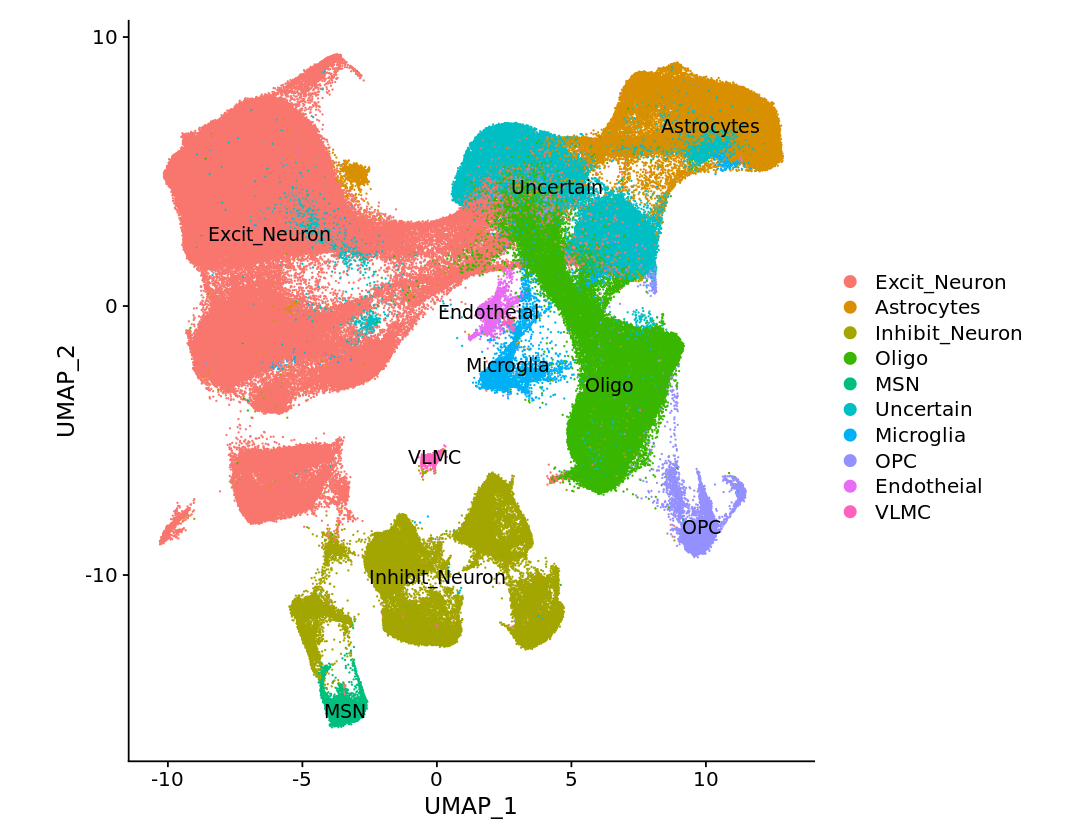

In [20]:
Idents(seurat) = "class"
options(repr.plot.width=9, repr.plot.height=7)
DimPlot(seurat, reduction="umap", label=T,raster=FALSE)+coord_fixed()

In [22]:
# 每个class抽样80%，最多500个细胞
sampleRatio = 0.8
maxCell = 5000
sampleDf = seurat@meta.data[, c("class"), drop=F]
sampleList = split(sampleDf, sampleDf$class)
sampleList = lapply(sampleList, function(x) {
    sampleSize = as.integer(nrow(x)*0.8)
    if (sampleSize > maxCell) {
        sampleSize = maxCell
    }
    sampleIdx = 1:nrow(x)
    sampleIdx = sample(1:nrow(x), size=sampleSize, replace=F)
    return(x[sampleIdx,,drop=F])
})
sampleDf = Reduce(rbind, sampleList)
str(sampleDf)
table(sampleDf$class)

trainSeurat = seurat[,rownames(sampleDf)]
table(trainSeurat$class)

'data.frame':	40097 obs. of  1 variable:
 $ class: chr  "Astrocytes" "Astrocytes" "Astrocytes" "Astrocytes" ...



    Astrocytes     Endotheial   Excit_Neuron Inhibit_Neuron      Microglia 
          5000           1628           5000           5000           4249 
           MSN          Oligo            OPC      Uncertain           VLMC 
          3648           5000           5000           5000            572 


    Astrocytes     Endotheial   Excit_Neuron Inhibit_Neuron      Microglia 
          5000           1628           5000           5000           4249 
           MSN          Oligo            OPC      Uncertain           VLMC 
          3648           5000           5000           5000            572 

In [ ]:
Idents(trainSeurat) = "class"
classMarker = FindAllMarkers(trainSeurat)
#write_tsv(classMarker, paste0(dataDir, "/allSnRNAseq.soupx.mergeSeuratFiltlibFilt800mt5Ratio1d2.downsample5000ClassMarker.20220822.tsv"))


Calculating cluster Astrocytes

Calculating cluster Endotheial

Calculating cluster Excit_Neuron

Calculating cluster Inhibit_Neuron

Calculating cluster Microglia

Calculating cluster MSN

Calculating cluster Oligo

Calculating cluster OPC

Calculating cluster Uncertain

Calculating cluster VLMC




    Astrocytes     Endotheial   Excit_Neuron Inhibit_Neuron      Microglia 
            47             54             34             30             31 
           MSN          Oligo            OPC      Uncertain           VLMC 
           141             66             32             42             26 

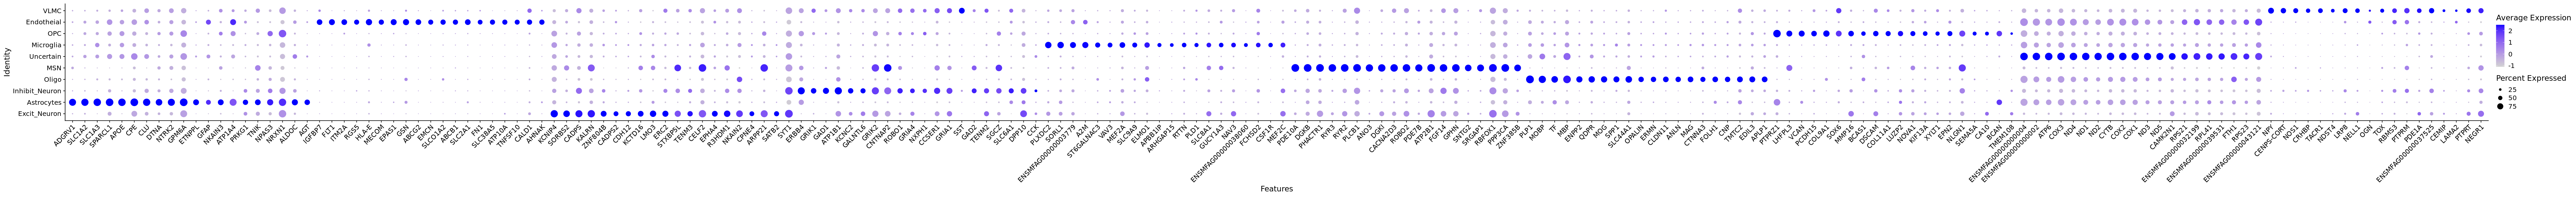

In [27]:
#classMarker = read_tsv(paste0(dataDir, "/allSnRNAseq.soupx.mergeSeuratFiltlibFilt800mt5Ratio1d2.downsample5000ClassMarker.20220822.tsv"))
classMarker = subset(classMarker, p_val_adj < 0.01 & avg_log2FC > 1)
table(classMarker$cluster)

classMarkerTop = classMarker %>% group_by(cluster) %>% top_n(n = 20, wt = avg_log2FC)
options(repr.plot.width=length(unique(classMarkerTop$gene))/3, repr.plot.height=5)
Idents(seurat) = "class"
DotPlot(seurat, features=unique(c(classMarkerTop$gene))) + RotatedAxis()

In [28]:
trainDf = as.data.frame(t(as.matrix(trainSeurat[["SCT"]]@data[unique(classMarker$gene), ])))
trainDf$class = trainSeurat$class
trainDf = subset(trainDf, class != "Uncertain")
trainDf$class = factor(trainDf$class)
# We need to modify the name of the columns
colnames(trainDf) = paste0("col_", colnames(trainDf))
colnames(trainDf) = gsub("-", "_", colnames(trainDf))

rf = randomForest(col_class~., data=trainDf, ntree=500)
#saveRDS(rf, paste0(dataDir, "/allSnRNAseq.soupx.mergeSeuratFiltlibFilt800mt5Ratio1d2.class.randomForest.20220822.rds"))

 num [1:9, 1:10] 4912 24 28 23 70 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:9] "Astrocytes" "Endotheial" "Excit_Neuron" "Inhibit_Neuron" ...
  ..$ : chr [1:10] "Astrocytes" "Endotheial" "Excit_Neuron" "Inhibit_Neuron" ...


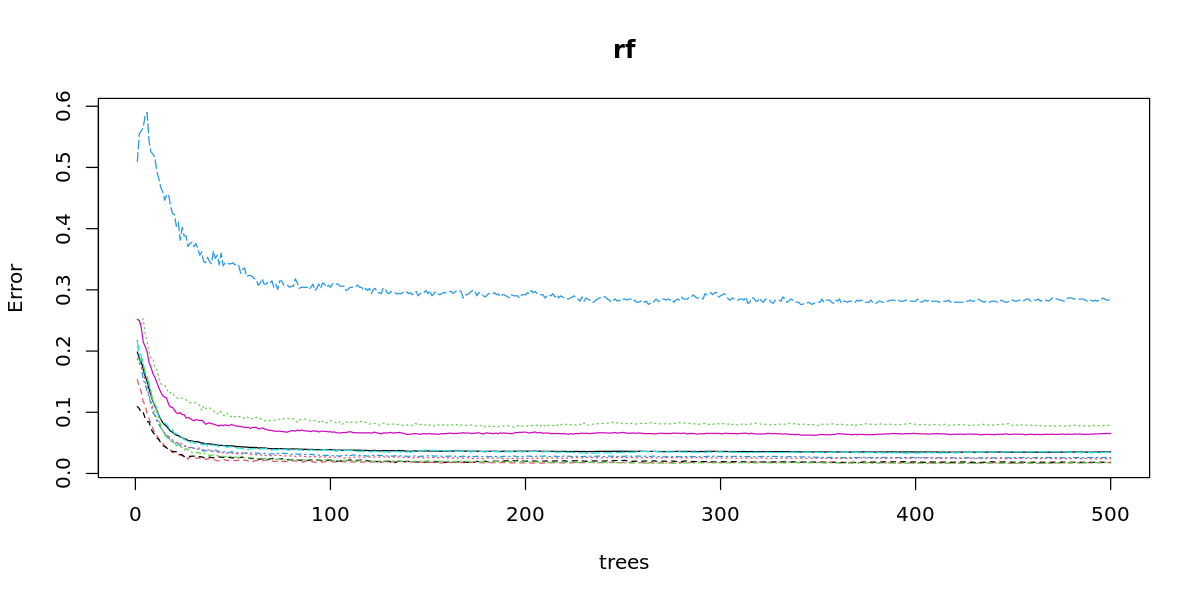

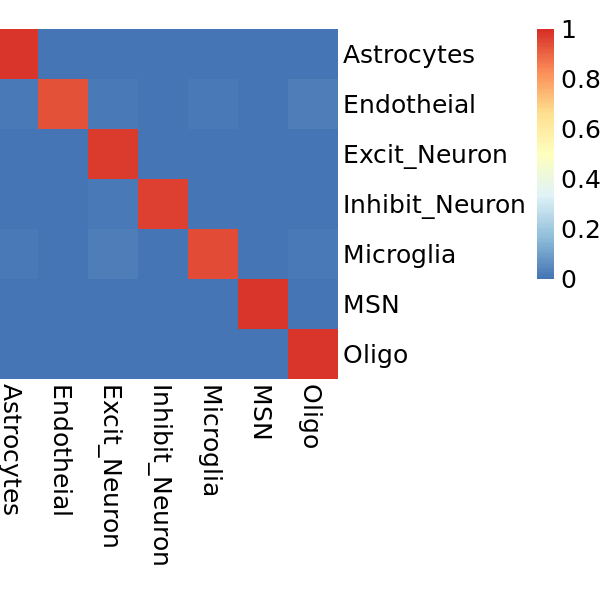

In [29]:
#rf = readRDS(paste0(dataDir, "/allSnRNAseq.soupx.mergeSeuratFiltlibFilt800mt5Ratio1d2.class.randomForest.20220822.rds"))
str(rf$confusion)
options(repr.plot.width=10, repr.plot.height=5)
plot(rf)

confusionRatio = t(apply(rf$confusion[1:7, 1:7], 1, function(x) {x/sum(x)}))
options(repr.plot.width=5, repr.plot.height=5)
pheatmap(confusionRatio, breaks=seq(0,1,0.01), cluster_rows=F, cluster_cols=F, border_color=NA, cellwidth=30, cellheight=30, fontsize=15)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.3 GiB”


 'matrix' num [1:369816, 1:9] 0.008 0 0.818 0.004 0.022 0.012 0.048 0.004 0.01 0.01 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:369816] "6103-1_CELL148_N3" "6103-1_CELL538_N2" "6103-1_CELL6244_N1" "6103-1_CELL559_N2" ...
  ..$ : chr [1:9] "Astrocytes" "Endotheial" "Excit_Neuron" "Inhibit_Neuron" ...


cellId             maxPredClassScore maxPredClass  
1 6103-1_CELL148_N3  0.762             Excit_Neuron  
2 6103-1_CELL538_N2  0.886             Excit_Neuron  
3 6103-1_CELL6244_N1 0.818             Astrocytes    
4 6103-1_CELL559_N2  0.864             Inhibit_Neuron
5 6103-1_CELL6281_N1 0.454             Oligo         
6 6103-1_CELL2198_N1 0.924             Excit_Neuron

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1500  0.6800  0.8820  0.7872  0.9580  1.0000 

[1] TRUE

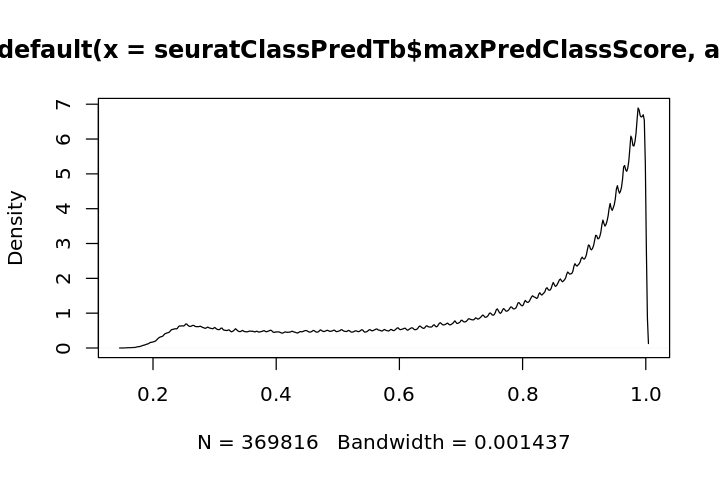

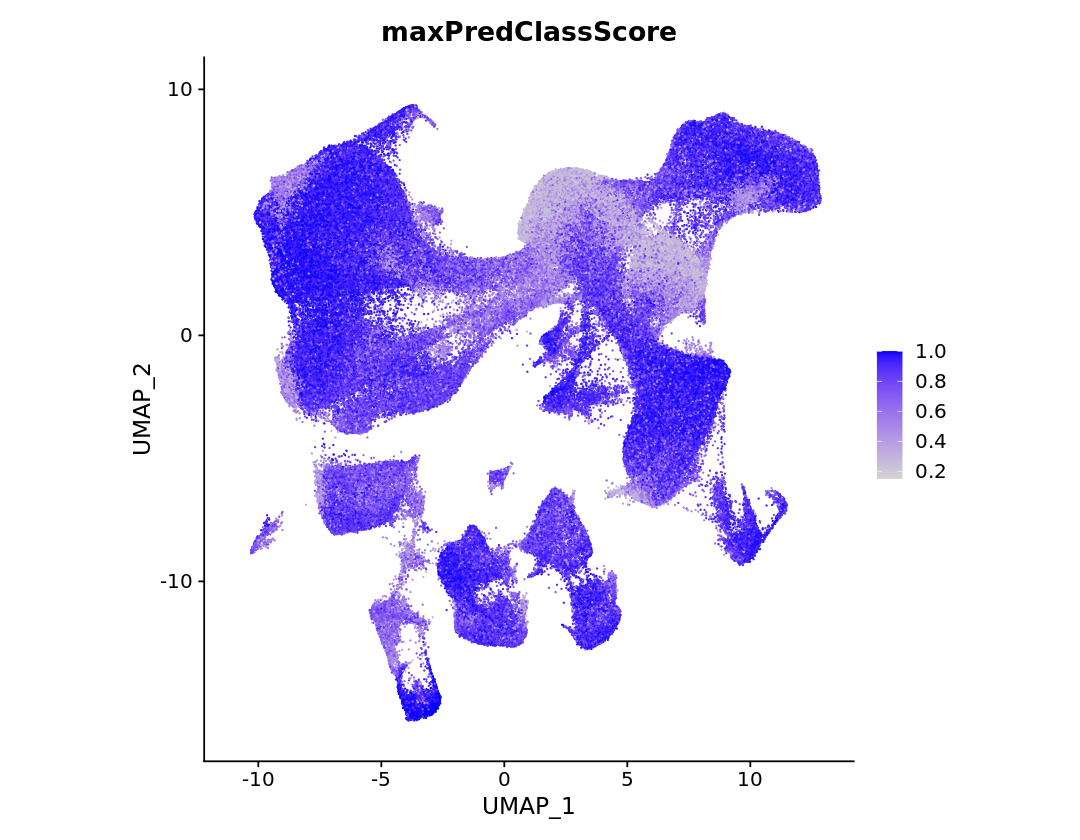

In [30]:
# Apply the trainer to filter cells
seuratCountDf = as.data.frame(t(as.matrix(seurat[["SCT"]]@data[unique(classMarker$gene), ])))
colnames(seuratCountDf) = paste0("col_", colnames(seuratCountDf))
colnames(seuratCountDf) = gsub("-", "_", colnames(seuratCountDf))
seuratClassPred = predict(rf, seuratCountDf, type="prob")
str(seuratClassPred)

seuratClassPredTb = tibble(
    cellId = rownames(seuratClassPred),
    maxPredClassScore = apply(seuratClassPred, 1, max),
    maxPredClass = apply(seuratClassPred, 1, function(x) {names(x)[which.max(x)]})
)
head(seuratClassPredTb)

summary(seuratClassPredTb$maxPredClassScore)
options(repr.plot.width=6, repr.plot.height=4)
plot(density(seuratClassPredTb$maxPredClassScore, adjust=0.1))

identical(seuratClassPredTb$cellId, rownames(seurat@meta.data))
tmpDf = as.data.frame(seuratClassPredTb[c("maxPredClassScore", "maxPredClass")])
rownames(tmpDf) = seuratClassPredTb$cellId

seurat = AddMetaData(seurat, tmpDf)

options(repr.plot.width=9, repr.plot.height=7)
FeaturePlot(seurat, reduction="umap", features="maxPredClassScore",raster=FALSE)+coord_fixed()


In [31]:
# Filter class outliers
# Removed clusters classified with ambiguous labels
# Removed cells classified with a different label from the majority of cells in its clusters
# Removed outliers when clustering, typically on the fringes of clusters in U-map space

Idents(seurat) = "seurat_clusters"
cellNum0 = ncol(seurat)
classFiltSeurat = subset(seurat, maxPredClassScore >= 0.8)
cellNum1 = ncol(classFiltSeurat)
message("Filt cell ratio: ", cellNum1/cellNum0)



Filt cell ratio: 0.638371514482878



In [33]:
seurat
classFiltSeurat

An object of class Seurat 
43339 features across 369816 samples within 2 assays 
Active assay: SCT (21376 features, 5000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
43339 features across 236080 samples within 2 assays 
Active assay: SCT (21376 features, 5000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [34]:
#EXIN按照nfeature800过滤
df_fil=classFiltSeurat@meta.data
EX_cell=rownames(df_fil[df_fil$nFeature_RNA > 800 & df_fil$maxPredClass=='Excit_Neuron',])
IN_cell=rownames(df_fil[df_fil$nFeature_RNA > 800 & df_fil$maxPredClass=='Inhibit_Neuron',])
Other_cell=rownames(df_fil[df_fil$maxPredClass %in% setdiff(unique(df_fil$maxPredClass),c('Excit_Neuron','Inhibit_Neuron')),])
fil_cell=c(EX_cell,IN_cell,Other_cell)

classFiltSeurat=subset(classFiltSeurat,cells = fil_cell)

classFiltSeurat


An object of class Seurat 
43339 features across 234076 samples within 2 assays 
Active assay: SCT (21376 features, 5000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [35]:
saveRDS(classFiltSeurat,'/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/macaque_snrna_batch123_soupX_fil300_800_SCT_0821_SCT.rds')




In [36]:
table(classFiltSeurat$class)


    Astrocytes     Endotheial   Excit_Neuron Inhibit_Neuron      Microglia 
         27393           1543         120460          26985           4425 
           MSN          Oligo            OPC      Uncertain           VLMC 
          4291          40575           6860           1208            336 

In [ ]:

suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
suppressMessages(library(SeuratData))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(ggsci))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(LSD))
suppressMessages(library(readxl))
suppressMessages(library(ggrepel))
suppressMessages(library(randomForest))
suppressMessages(library(harmony))

options(future.globals.maxSize= 1000 * 1024^16 )

EX_resolution=1.0
IN_resolution=1.0
NON_resolution=0.1
readDir='/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/'
file_name='macaque_snrna_batch123_soupX_fil300_800_SCT_0821_SCT.rds'
dataDir=paste0('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/dif_res_anno/')

classFiltSeurat=readRDS(paste0(readDir,file_name))
classFiltSeurat

#过滤nFeature<800的EX及IN
df_fil=classFiltSeurat@meta.data
EX_cell=rownames(df_fil[df_fil$nFeature_RNA > 800 & df_fil$maxPredClass=='Excit_Neuron',])
IN_cell=rownames(df_fil[df_fil$nFeature_RNA > 800 & df_fil$maxPredClass=='Inhibit_Neuron',])
Other_cell=rownames(df_fil[df_fil$maxPredClass %in% setdiff(unique(df_fil$maxPredClass),c('Excit_Neuron','Inhibit_Neuron')),])
fil_cell=c(EX_cell,IN_cell,Other_cell)

classFiltSeurat=subset(classFiltSeurat,cells = fil_cell)

classFiltSeurat
classFiltSeurat
table(classFiltSeurat@meta.data$maxPredClass)

Excit=subset(classFiltSeurat,maxPredClass=='Excit_Neuron')
Inhibit=subset(classFiltSeurat,maxPredClass=='Inhibit_Neuron')
Astrocytes=subset(classFiltSeurat,maxPredClass=='Astrocytes')
Oligo=subset(classFiltSeurat,maxPredClass=='Oligo')
Microglia=subset(classFiltSeurat,maxPredClass=='Microglia')
OPC=subset(classFiltSeurat,maxPredClass=='OPC')
MSN=subset(classFiltSeurat,maxPredClass=='MSN')
pbmc=classFiltSeurat

Inhibit
all.genes <- rownames(Inhibit)
Inhibit <- ScaleData(Inhibit, features = all.genes)
Inhibit <- RunPCA(Inhibit, features = VariableFeatures(object = pbmc))
Inhibit <- FindNeighbors(Inhibit, dims = 1:15)
Inhibit <- FindClusters(Inhibit, resolution = IN_resolution)
head(Idents(Inhibit), 5)
Inhibit <- RunUMAP(Inhibit, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(Inhibit, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',IN_resolution,'_umap_IN.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)



Excit
all.genes <- rownames(Excit)
Excit <- ScaleData(Excit, features = all.genes)
Excit <- RunPCA(Excit, features = VariableFeatures(object = pbmc))
Excit <- FindNeighbors(Excit, dims = 1:15)
Excit <- FindClusters(Excit, resolution = EX_resolution)
head(Idents(Excit), 5)
Excit <- RunUMAP(Excit, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(Excit, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',IN_resolution,'_umap_EX.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)

Astrocytes
all.genes <- rownames(Astrocytes)
Astrocytes <- ScaleData(Astrocytes, features = all.genes)
Astrocytes <- RunPCA(Astrocytes, features = VariableFeatures(object = pbmc))
Astrocytes <- FindNeighbors(Astrocytes, dims = 1:15)
Astrocytes <- FindClusters(Astrocytes, resolution = NON_resolution)
head(Idents(Astrocytes), 5)
Astrocytes <- RunUMAP(Astrocytes, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(Astrocytes, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',NON_resolution,'_umap_IN.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)



Oligo
all.genes <- rownames(Oligo)
Oligo <- ScaleData(Oligo, features = all.genes)
Oligo <- RunPCA(Oligo, features = VariableFeatures(object = pbmc))
Oligo <- FindNeighbors(Oligo, dims = 1:15)
Oligo <- FindClusters(Oligo, resolution = NON_resolution)
head(Idents(Oligo), 5)
Oligo <- RunUMAP(Oligo, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(Oligo, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',NON_resolution,'_umap_IN.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)

Microglia
all.genes <- rownames(Microglia)
Microglia <- ScaleData(Microglia, features = all.genes)
Microglia <- RunPCA(Microglia, features = VariableFeatures(object = pbmc))
Microglia <- FindNeighbors(Microglia, dims = 1:15)
Microglia <- FindClusters(Microglia, resolution = NON_resolution)
head(Idents(Microglia), 5)
Microglia <- RunUMAP(Microglia, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(Microglia, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',NON_resolution,'_umap_IN.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)

OPC
all.genes <- rownames(OPC)
OPC <- ScaleData(OPC, features = all.genes)
OPC <- RunPCA(OPC, features = VariableFeatures(object = pbmc))
OPC <- FindNeighbors(OPC, dims = 1:15)
OPC <- FindClusters(OPC, resolution = NON_resolution)
head(Idents(OPC), 5)
OPC <- RunUMAP(OPC, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(OPC, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',NON_resolution,'_umap_IN.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)

MSN
all.genes <- rownames(MSN)
MSN <- ScaleData(MSN, features = all.genes)
MSN <- RunPCA(MSN, features = VariableFeatures(object = pbmc))
MSN <- FindNeighbors(MSN, dims = 1:15)
MSN <- FindClusters(MSN, resolution = NON_resolution)
head(Idents(MSN), 5)
MSN <- RunUMAP(MSN, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(MSN, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',NON_resolution,'_umap_IN.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)
Astrocytes@meta.data$Subclass=paste0(Astrocytes@meta.data$maxPredClass,'_',Astrocytes@meta.data$seurat_clusters)
Oligo@meta.data$Subclass=paste0(Oligo@meta.data$maxPredClass,'_',Oligo@meta.data$seurat_clusters)
Microglia@meta.data$Subclass=paste0(Microglia@meta.data$maxPredClass,'_',Microglia@meta.data$seurat_clusters)
OPC@meta.data$Subclass=paste0(OPC@meta.data$maxPredClass,'_',OPC@meta.data$seurat_clusters)
MSN@meta.data$Subclass=paste0(MSN@meta.data$maxPredClass,'_',MSN@meta.data$seurat_clusters)

sub1=Astrocytes@meta.data[,'Subclass',drop=F]
sub2=Oligo@meta.data[,'Subclass',drop=F]
sub3=Microglia@meta.data[,'Subclass',drop=F]
sub4=OPC@meta.data[,'Subclass',drop=F]
sub5=MSN@meta.data[,'Subclass',drop=F]
sub6=Excit@meta.data[,'Subclass',drop=F]
sub7=Inhibit@meta.data[,'Subclass',drop=F]

sub_2=rbind(sub1,sub2,sub3,sub4,sub5,sub6,sub7)

df_dir=dataDir
save_file_name=paste0(df_dir,EX_resolution,'_res',IN_resolution,'_res',NON_resolution,'_anno.csv')
write.csv(sub_2,save_file_name)


classFiltSeurat=AddMetaData(classFiltSeurat,sub_2,col.name = 'Subclass')

classFiltSeurat
table(classFiltSeurat$Subclass)

# 每个class抽样80%，最多3000个细胞
seurat=classFiltSeurat
sampleRatio = 0.8
maxCell = 3000
sampleDf = seurat@meta.data[, c("Subclass"), drop=F]
sampleList = split(sampleDf, sampleDf$Subclass)
sampleList = lapply(sampleList, function(x) {
    sampleSize = as.integer(nrow(x)*0.8)
    if (sampleSize > maxCell) {
        sampleSize = maxCell
    }
    sampleIdx = 1:nrow(x)
    sampleIdx = sample(1:nrow(x), size=sampleSize, replace=F)
    return(x[sampleIdx,,drop=F])
})
sampleDf = Reduce(rbind, sampleList)
str(sampleDf)
table(sampleDf$class)

trainSeurat = seurat[,rownames(sampleDf)]
table(trainSeurat$Subclass)

saveDir=paste0(dataDir,'train_seurat/')
#saveRDS(trainSeurat,paste0(saveDir,'res',EX_resolution,'_res',IN_resolution,'_traindata.rds'))
#trainSeurat=readRDS(paste0(saveDir,'res',EX_resolution,'_res',IN_resolution,'_traindata.rds'))
Idents(trainSeurat) = "Subclass"
plan("multicore", workers = 5)
classMarker = FindAllMarkers(trainSeurat)
write_tsv(classMarker, paste0(saveDir, "/train_res",EX_resolution,'_res',IN_resolution,'_res',NON_resolution,"_downsample3000_subclass_marker.tsv"))


classMarker=read.table(paste0(saveDir, "/train_res",EX_resolution,'_res',IN_resolution,'_res',NON_resolution,"_downsample3000_subclass_marker.tsv"))
colnames(classMarker)=classMarker[1,]
classMarker=classMarker[-1,]

#classMarker = read_tsv(paste0(dataDir, "/allSnRNAseq.soupx.mergeSeuratFiltlibFilt800mt5Ratio1d2.downsample5000ClassMarker.20220822.tsv"))
classMarker = subset(classMarker, p_val_adj < 0.01 & avg_log2FC > 1)
table(classMarker$cluster)


classMarkerTop = classMarker %>% group_by(cluster) %>% top_n(n = 20, wt = avg_log2FC)
options(repr.plot.width=40, repr.plot.height=10)
Idents(seurat) = "Subclass"
DotPlot(seurat, features=unique(c(classMarkerTop$gene))) + RotatedAxis()

trainDf = as.data.frame(t(as.matrix(trainSeurat[["SCT"]]@data[unique(classMarker$gene), ])))
trainDf$Subclass = trainSeurat$Subclass
trainDf$Subclass = factor(trainDf$Subclass)

# We need to modify the name of the columns
colnames(trainDf) = paste0("col_", colnames(trainDf))
colnames(trainDf) = gsub("-", "_", colnames(trainDf))

rf = randomForest(col_Subclass~., data=trainDf, ntree=500)

saveRDS(rf, paste0(saveDir, "/Subclass.randomForest.20230627res",EX_resolution,'_res',IN_resolution,".rds"))

#rf = readRDS(paste0(dataDir, "/allSnRNAseq.soupx.mergeSeuratFiltlibFilt800mt5Ratio1d2.class.randomForest.20220822.rds"))
str(rf$confusion)
options(repr.plot.width=10, repr.plot.height=5)
plot(rf)

confusionRatio = t(apply(rf$confusion[1:min(dim(rf$confusion)), 1:min(dim(rf$confusion))], 1, function(x) {x/sum(x)}))
options(repr.plot.width=25, repr.plot.height=25)
p1=pheatmap(confusionRatio, breaks=seq(0,1,0.01), cluster_rows=F, cluster_cols=F, border_color=NA, cellwidth=30, cellheight=30, fontsize=15)

save_pheatmap_pdf <- function(x, filename, width=120, height=24) {
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  pdf(filename, width=width, height=height)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',IN_resolution,'_res',NON_resolution,'_heatmap.pdf')

save_pheatmap_pdf(p1,save_file_name ,30,30)



In [ ]:
#!/bin/bash
#SBATCH -e /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/dif_res_anno/err1
#SBATCH -o /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/dif_res_anno/out1
#SBATCH -J test1
#SBATCH -p premium
#SBATCH -n 10
#SBATCH --mem 400000
Rscript /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/dif_res_anno/non_test1.R



In [ ]:

suppressMessages(library(tidyverse))
suppressMessages(library(parallel))
suppressMessages(library(Seurat))
suppressMessages(library(SeuratData))
suppressMessages(library(patchwork))
suppressMessages(library(Matrix))
suppressMessages(library(viridis))
suppressMessages(library(cowplot))
suppressMessages(library(ggsci))
suppressMessages(library(pheatmap))
suppressMessages(library(RColorBrewer))
suppressMessages(library(reshape2))
suppressMessages(library(LSD))
suppressMessages(library(readxl))
suppressMessages(library(ggrepel))
suppressMessages(library(randomForest))
suppressMessages(library(harmony))

options(future.globals.maxSize= 1000 * 1024^2 )

EX_resolution=0.6
IN_resolution=0.6
readDir='/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/soupX.flt_Matrix/'
file_name='macaque_snrna_batch123_soupX_fil300_800_SCT_0821_SCT.rds'
dataDir=paste0('/home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0821_renew_batch3_all/dif_res_anno/')

classFiltSeurat=readRDS(paste0(readDir,file_name))
classFiltSeurat

#过滤nFeature<800的EX及IN
df_fil=classFiltSeurat@meta.data
EX_cell=rownames(df_fil[df_fil$nFeature_RNA > 800 & df_fil$maxPredClass=='Excit_Neuron',])
IN_cell=rownames(df_fil[df_fil$nFeature_RNA > 800 & df_fil$maxPredClass=='Inhibit_Neuron',])
Other_cell=rownames(df_fil[df_fil$maxPredClass %in% setdiff(unique(df_fil$maxPredClass),c('Excit_Neuron','Inhibit_Neuron')),])
fil_cell=c(EX_cell,IN_cell,Other_cell)

classFiltSeurat=subset(classFiltSeurat,cells = fil_cell)

classFiltSeurat
classFiltSeurat
table(classFiltSeurat@meta.data$maxPredClass)

Excit=subset(classFiltSeurat,maxPredClass=='Excit_Neuron')
Inhibit=subset(classFiltSeurat,maxPredClass=='Inhibit_Neuron')
pbmc=classFiltSeurat

Inhibit
all.genes <- rownames(Inhibit)
Inhibit <- ScaleData(Inhibit, features = all.genes)
Inhibit <- RunPCA(Inhibit, features = VariableFeatures(object = pbmc))
Inhibit <- FindNeighbors(Inhibit, dims = 1:15)
Inhibit <- FindClusters(Inhibit, resolution = IN_resolution)
head(Idents(Inhibit), 5)
Inhibit <- RunUMAP(Inhibit, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(Inhibit, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',IN_resolution,'_umap_IN.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)



Excit
all.genes <- rownames(Excit)
Excit <- ScaleData(Excit, features = all.genes)
Excit <- RunPCA(Excit, features = VariableFeatures(object = pbmc))
Excit <- FindNeighbors(Excit, dims = 1:15)
Excit <- FindClusters(Excit, resolution = EX_resolution)
head(Idents(Excit), 5)
Excit <- RunUMAP(Excit, dims = 1:15)
options(repr.plot.height=5,repr.plot.width=5)
p1=DimPlot(Excit, reduction = "umap")
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',IN_resolution,'_umap_EX.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)

Excit@meta.data$Subclass=paste0(Excit@meta.data$maxPredClass,'_',Excit@meta.data$seurat_clusters)
Inhibit@meta.data$Subclass=paste0(Inhibit@meta.data$maxPredClass,'_',Inhibit@meta.data$seurat_clusters)
sub_in=Inhibit@meta.data[,'Subclass',drop=F]
sub_ex=Excit@meta.data[,'Subclass',drop=F]
sub_2=rbind(sub_in,sub_ex)
classFiltSeurat=AddMetaData(classFiltSeurat,sub_2,col.name = 'Subclass')
classFiltSeurat@meta.data[is.na(classFiltSeurat@meta.data$Subclass),]$Subclass=classFiltSeurat@meta.data[is.na(classFiltSeurat@meta.data$Subclass),]$maxPredClass


options(repr.plot.height=12,repr.plot.width=12)
DimPlot(classFiltSeurat, label = TRUE, group.by="Subclass",raster=FALSE) + NoLegend()

p1=DimPlot(classFiltSeurat, label = TRUE, group.by="Subclass",raster=FALSE) + NoLegend()
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',IN_resolution,'_umap_all.pdf')
ggsave(save_file_name,width = 5, height = 5, dpi = 100,plot = p1)


save_name=gsub('.rds','',file_name)
#过滤细胞数<300的cluster
df_fil=as.data.frame(table(classFiltSeurat$Subclass))
slect_type=as.character(df_fil[df_fil$Freq > 300,]$Var1)
classFiltSeurat=subset(classFiltSeurat,Subclass %in% slect_type)

saveRDS(classFiltSeurat,paste0(dataDir, "/",save_name,EX_resolution,"_res",IN_resolution,".rds"))

classFiltSeurat
table(classFiltSeurat$Subclass)

# 每个class抽样80%，最多3000个细胞
seurat=classFiltSeurat
sampleRatio = 0.8
maxCell = 3000
sampleDf = seurat@meta.data[, c("Subclass"), drop=F]
sampleList = split(sampleDf, sampleDf$Subclass)
sampleList = lapply(sampleList, function(x) {
    sampleSize = as.integer(nrow(x)*0.8)
    if (sampleSize > maxCell) {
        sampleSize = maxCell
    }
    sampleIdx = 1:nrow(x)
    sampleIdx = sample(1:nrow(x), size=sampleSize, replace=F)
    return(x[sampleIdx,,drop=F])
})
sampleDf = Reduce(rbind, sampleList)
str(sampleDf)
table(sampleDf$class)

trainSeurat = seurat[,rownames(sampleDf)]
table(trainSeurat$Subclass)

saveDir=paste0(dataDir,'train_seurat/')
#saveRDS(trainSeurat,paste0(saveDir,'res',EX_resolution,'_res',IN_resolution,'_traindata.rds'))
#trainSeurat=readRDS(paste0(saveDir,'res',EX_resolution,'_res',IN_resolution,'_traindata.rds'))
Idents(trainSeurat) = "Subclass"
plan("multicore", workers = 5)
classMarker = FindAllMarkers(trainSeurat)
write_tsv(classMarker, paste0(saveDir, "/train_res",EX_resolution,'_res',IN_resolution,"_downsample3000_subclass_marker.tsv"))


classMarker=read.table(paste0(saveDir, "/train_res",EX_resolution,'_res',IN_resolution,"_downsample3000_subclass_marker.tsv"))
colnames(classMarker)=classMarker[1,]
classMarker=classMarker[-1,]

#classMarker = read_tsv(paste0(dataDir, "/allSnRNAseq.soupx.mergeSeuratFiltlibFilt800mt5Ratio1d2.downsample5000ClassMarker.20220822.tsv"))
classMarker = subset(classMarker, p_val_adj < 0.01 & avg_log2FC > 1)
table(classMarker$cluster)


classMarkerTop = classMarker %>% group_by(cluster) %>% top_n(n = 20, wt = avg_log2FC)
options(repr.plot.width=40, repr.plot.height=10)
Idents(seurat) = "Subclass"
DotPlot(seurat, features=unique(c(classMarkerTop$gene))) + RotatedAxis()

trainDf = as.data.frame(t(as.matrix(trainSeurat[["SCT"]]@data[unique(classMarker$gene), ])))
trainDf$Subclass = trainSeurat$Subclass
trainDf$Subclass = factor(trainDf$Subclass)

# We need to modify the name of the columns
colnames(trainDf) = paste0("col_", colnames(trainDf))
colnames(trainDf) = gsub("-", "_", colnames(trainDf))

rf = randomForest(col_Subclass~., data=trainDf, ntree=500)

saveRDS(rf, paste0(saveDir, "/Subclass.randomForest.20230627res",EX_resolution,'_res',IN_resolution,".rds"))

#rf = readRDS(paste0(dataDir, "/allSnRNAseq.soupx.mergeSeuratFiltlibFilt800mt5Ratio1d2.class.randomForest.20220822.rds"))
str(rf$confusion)
options(repr.plot.width=10, repr.plot.height=5)
plot(rf)

confusionRatio = t(apply(rf$confusion[1:min(dim(rf$confusion)), 1:min(dim(rf$confusion))], 1, function(x) {x/sum(x)}))
options(repr.plot.width=25, repr.plot.height=25)
p1=pheatmap(confusionRatio, breaks=seq(0,1,0.01), cluster_rows=F, cluster_cols=F, border_color=NA, cellwidth=30, cellheight=30, fontsize=15)

save_pheatmap_pdf <- function(x, filename, width=120, height=24) {
  stopifnot(!missing(x))
  stopifnot(!missing(filename))
  pdf(filename, width=width, height=height)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
fig_dir=paste0(dataDir,'fig/')
save_file_name=paste0(fig_dir,EX_resolution,'_res',IN_resolution,'_heatmap.pdf')

save_pheatmap_pdf(p1,save_file_name ,30,30)





In [ ]:
#!/bin/bash
#SBATCH -e /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0709_renew/dif_res_anno/script/err_res06res06
#SBATCH -o /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0709_renew/dif_res_anno/script/out_res06res06
#SBATCH -J res06res06
#SBATCH -p premium
#SBATCH -n 5
#SBATCH --mem 400000
Rscript /home/liuyx/liuyuxuan/spa_seurat/cla/macaca/sn_0709_renew/dif_res_anno/script/res06res06.R

